In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, accuracy_score

In [20]:
# Load the dataset (replace 'file.csv' with the actual filename)
df = pd.read_csv("/content/academic_performance_dataset_V2.csv")

In [21]:
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      3046 non-null   int64  
 1   Prog Code  3046 non-null   object 
 2   Gender     3046 non-null   object 
 3   YoG        3046 non-null   int64  
 4   CGPA       3046 non-null   float64
 5   CGPA100    3046 non-null   float64
 6   CGPA200    3046 non-null   float64
 7   CGPA300    3046 non-null   float64
 8   CGPA400    3046 non-null   float64
 9   SGPA       3046 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 238.1+ KB


,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


In [4]:
# Feature Engineering: Performance Trends
df['CGPA_Trend'] = df['CGPA400'] - df['CGPA100']
df['Risk_Flag'] = np.where(df['CGPA_Trend'] < -0.5, 1, 0)

In [13]:
# Save dataset with Risk_Flag
df.to_csv("student_performance_with_risk_flag.csv", index=False)

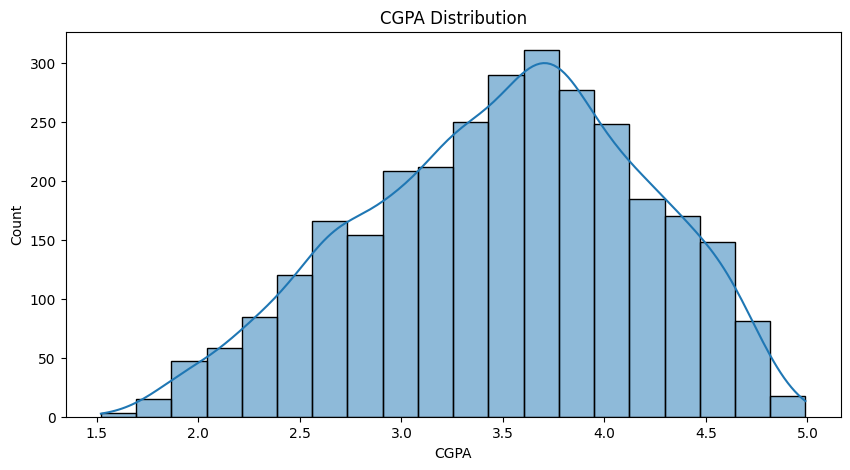

In [5]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
sns.histplot(df['CGPA'], kde=True, bins=20)
plt.title('CGPA Distribution')
plt.show()

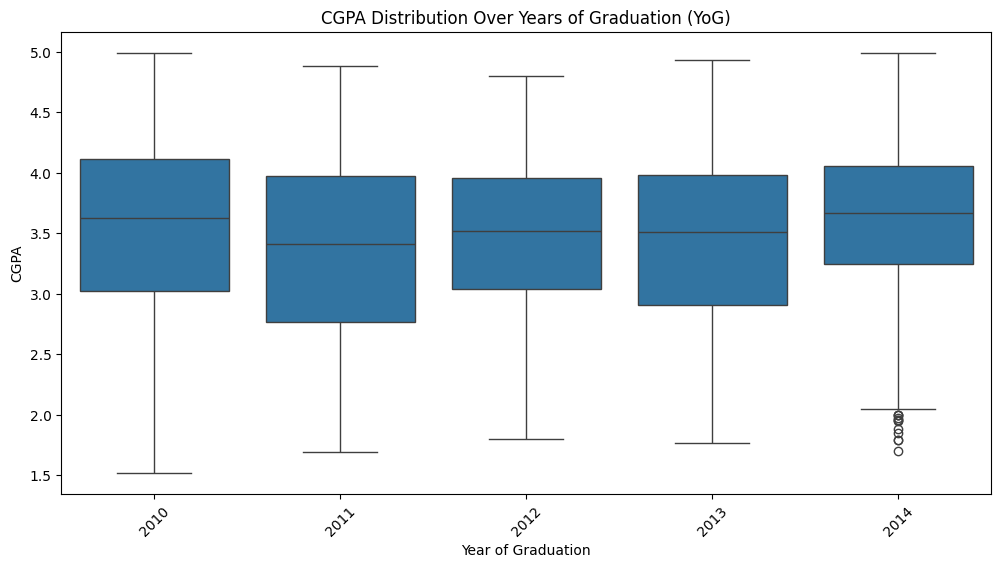


Top Year with Highest Average CGPA: 2014


In [28]:
# CGPA Distribution Over Years (YoG)
plt.figure(figsize=(12,6))
sns.boxplot(x='YoG', y='CGPA', data=df)
plt.title('CGPA Distribution Over Years of Graduation (YoG)')
plt.xlabel('Year of Graduation')
plt.ylabel('CGPA')
plt.xticks(rotation=45)
plt.show()
# Calculate and print the top year with the highest average CGPA
top_year = df.groupby('YoG')['CGPA'].mean().idxmax()
print(f"\nTop Year with Highest Average CGPA: {top_year}")

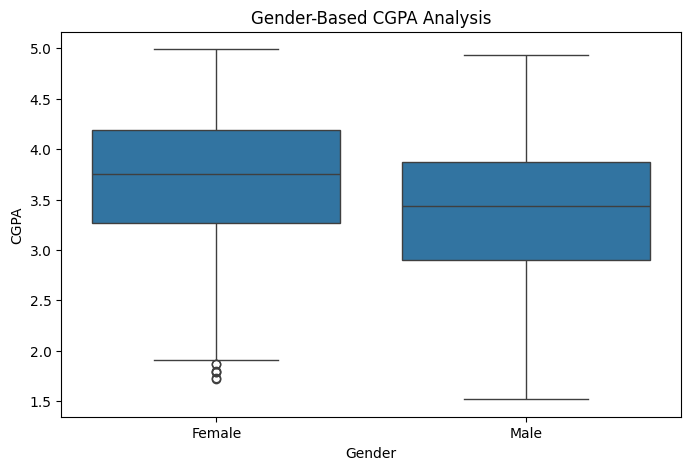

In [6]:
# Gender-based Performance Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='CGPA', data=df)
plt.title('Gender-Based CGPA Analysis')
plt.show()

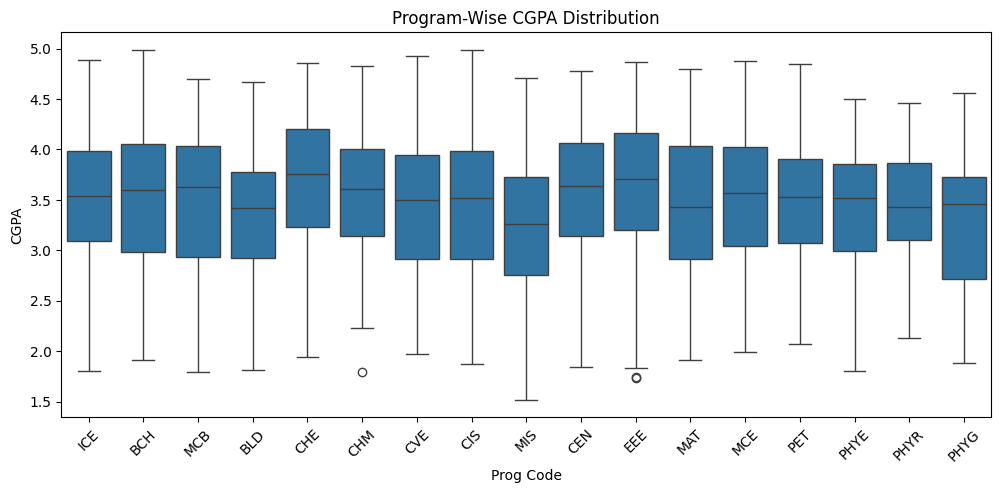


Top 5 Programs with Highest Average CGPA:
Prog Code
CHE    3.666714
EEE    3.639833
CHM    3.558649
BCH    3.541959
MCE    3.533696
Name: CGPA, dtype: float64


In [27]:
# Program-Specific Performance Analysis
plt.figure(figsize=(12,5))
sns.boxplot(x='Prog Code', y='CGPA', data=df)
plt.title('Program-Wise CGPA Distribution')
plt.xticks(rotation=45)
plt.show()
# Calculate and print top 5 programs with highest average CGPA
top_5_programs = df.groupby('Prog Code')['CGPA'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Programs with Highest Average CGPA:")
print(top_5_programs)

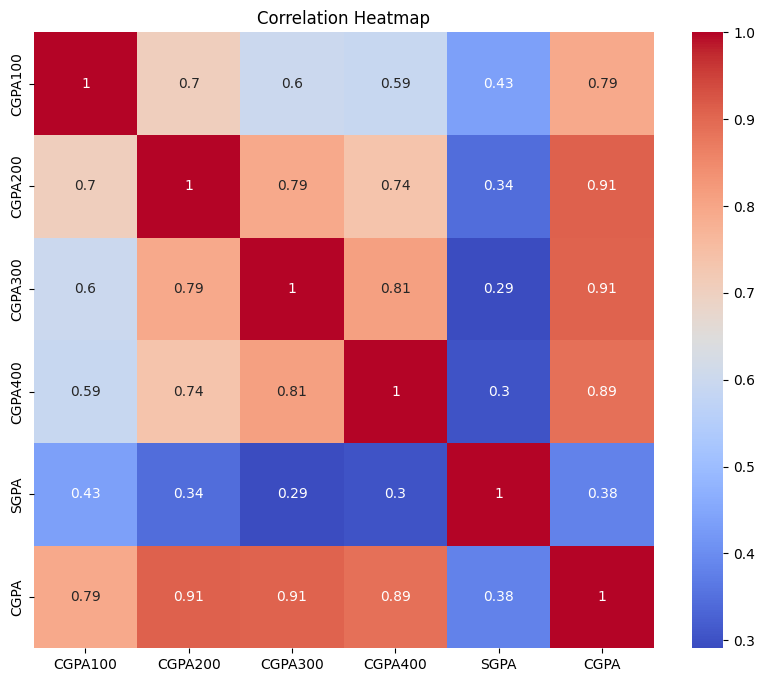

In [8]:
# Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df[['CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'SGPA', 'CGPA']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
#Predictive Modeling: Regression to predict final CGPA
X = df[['CGPA100', 'CGPA200', 'CGPA300']]
y = df['CGPA400']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")


Mean Absolute Error: 0.36


Logistic Regression Accuracy (Training): 0.82
Logistic Regression Accuracy (Testing): 0.81
Logistic Regression:


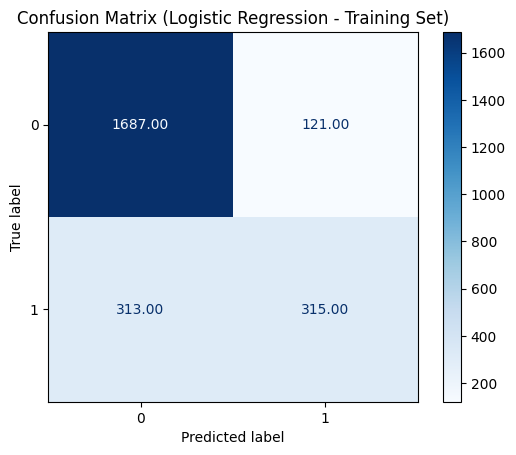

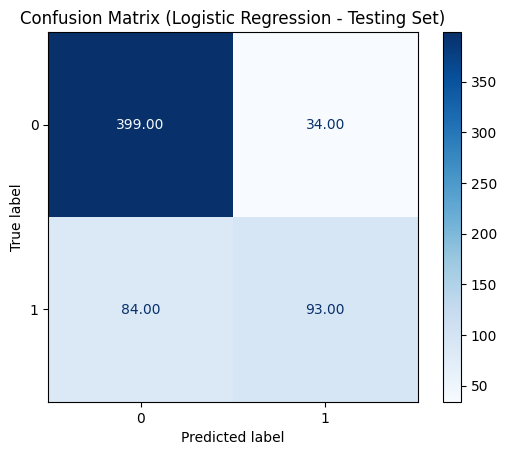


Random Forest Accuracy (Training): 1.00
Random Forest Accuracy (Testing): 0.82

Random Forest:


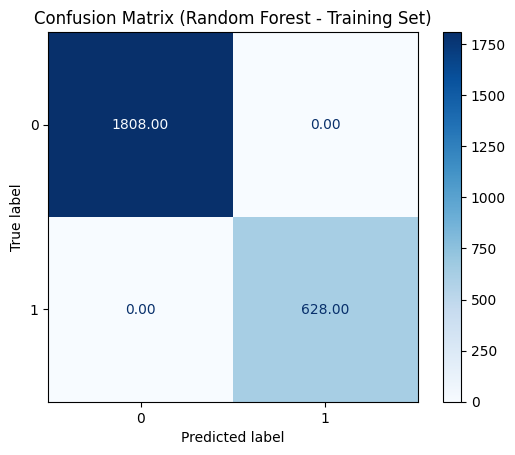

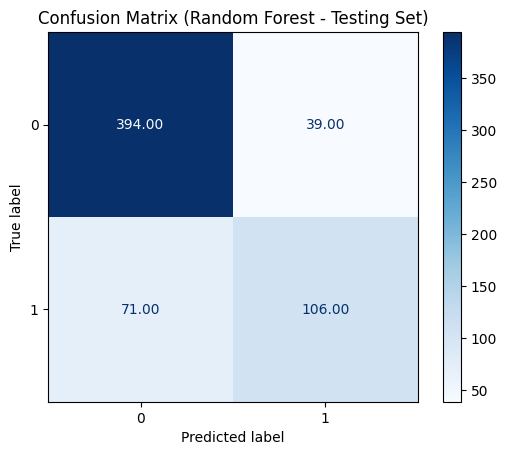

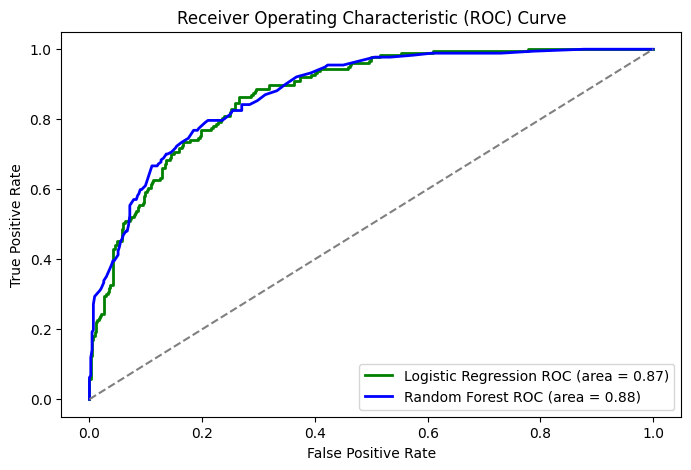

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# ... (your existing code for data loading, feature engineering, etc.) ...

# Classification: Identifying students at risk (Risk_Flag)
X_class = df[['CGPA100', 'CGPA200', 'CGPA300']]
y_class = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Logistic Regression
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)

# Predictions for training and testing sets
y_pred_log_train = clf_log.predict(X_train)
y_pred_log_test = clf_log.predict(X_test)

# Accuracy scores for Logistic Regression
log_accuracy_train = accuracy_score(y_train, y_pred_log_train)
log_accuracy_test = accuracy_score(y_test, y_pred_log_test)
print(f"Logistic Regression Accuracy (Training): {log_accuracy_train:.2f}")
print(f"Logistic Regression Accuracy (Testing): {log_accuracy_test:.2f}")

# ... (rest of the code for confusion matrices and ROC curve for Logistic Regression) ...
# Confusion Matrices for Logistic Regression
print("Logistic Regression:")
# Training set
conf_matrix_log_train = confusion_matrix(y_train, y_pred_log_train)
disp_log_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_train, display_labels=clf_log.classes_)
disp_log_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (Logistic Regression - Training Set)')
plt.show()

# Testing set
conf_matrix_log_test = confusion_matrix(y_test, y_pred_log_test)
disp_log_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_test, display_labels=clf_log.classes_)
disp_log_test.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (Logistic Regression - Testing Set)')
plt.show()

# Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Predictions for training and testing sets
y_pred_rf_train = clf_rf.predict(X_train)
y_pred_rf_test = clf_rf.predict(X_test)

# Accuracy scores for Random Forest
rf_accuracy_train = accuracy_score(y_train, y_pred_rf_train)
rf_accuracy_test = accuracy_score(y_test, y_pred_rf_test)
print(f"\nRandom Forest Accuracy (Training): {rf_accuracy_train:.2f}")
print(f"Random Forest Accuracy (Testing): {rf_accuracy_test:.2f}")

# ... (rest of the code for confusion matrices and ROC curve for Random Forest) ...
# Confusion Matrices for Random Forest
print("\nRandom Forest:")
# Training set
conf_matrix_rf_train = confusion_matrix(y_train, y_pred_rf_train)
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_train, display_labels=clf_rf.classes_)
disp_rf_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (Random Forest - Training Set)')
plt.show()

# Testing set
conf_matrix_rf_test = confusion_matrix(y_test, y_pred_rf_test)
disp_rf_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_test, display_labels=clf_rf.classes_)
disp_rf_test.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (Random Forest - Testing Set)')
plt.show()
# ROC Curves
plt.figure(figsize=(8, 5))

# Logistic Regression ROC
y_prob_log = clf_log.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, color='green', lw=2, label=f'Logistic Regression ROC (area = {roc_auc_log:.2f})')

# Random Forest ROC
y_prob_rf = clf_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC (area = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

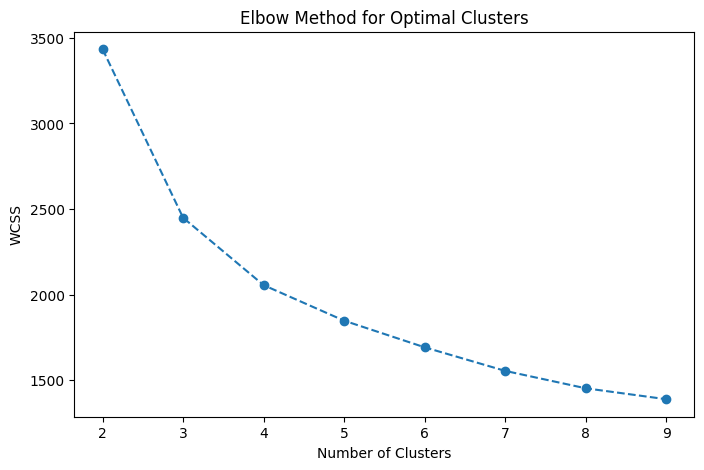

In [23]:
# Optimal Clusters: Elbow Method & Silhouette Score
X_cluster = df[['CGPA100', 'CGPA200', 'CGPA300', 'CGPA400']]

# Elbow Method
wcss = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

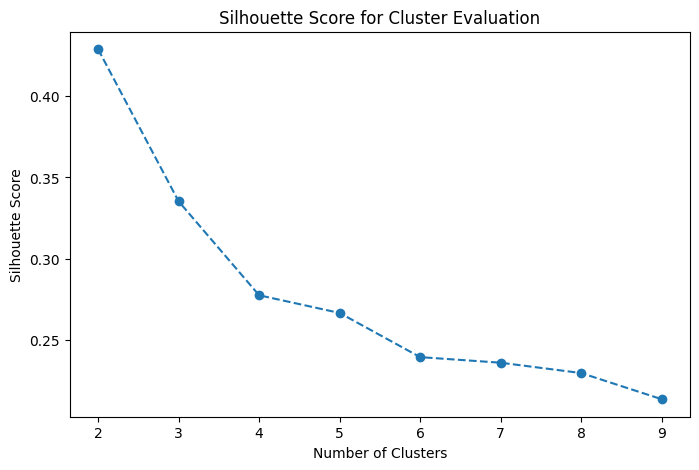

In [25]:
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, auc, silhouette_score
# Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Cluster Evaluation')
plt.show()

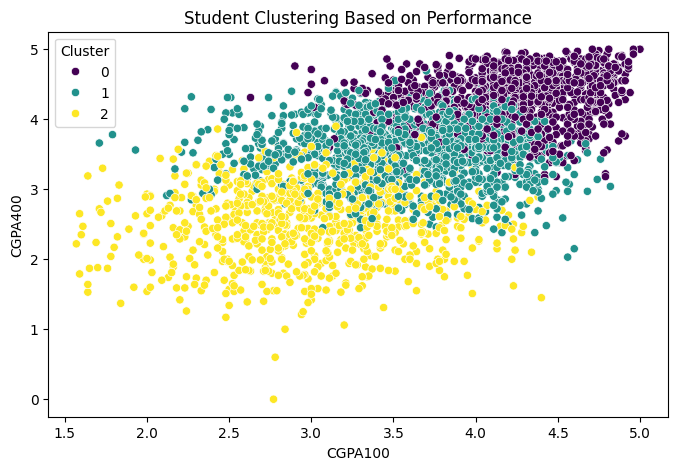

In [12]:
# Clustering Students based on CGPA trends
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['CGPA100', 'CGPA200', 'CGPA300', 'CGPA400']])

# Visualization of Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['CGPA100'], y=df['CGPA400'], hue=df['Cluster'], palette='viridis')
plt.title('Student Clustering Based on Performance')
plt.show()
